In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('Dataset/potato_dataset',shuffle=True,image_size=(266,256),batch_size=32)

Found 2152 files belonging to 3 classes.


In [3]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

In [5]:
68*32

2176

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[156.       153.       164.      ]
  [168.       165.       176.      ]
  [169.       166.       177.      ]
  ...
  [174.       171.       182.      ]
  [165.       162.       173.      ]
  [179.       176.       187.      ]]

 [[153.16917  150.16917  161.16917 ]
  [166.11278  163.11278  174.11278 ]
  [169.       166.       177.      ]
  ...
  [189.09775  186.09775  197.09775 ]
  [175.3797   172.3797   183.3797  ]
  [184.66165  181.66165  192.66165 ]]

 [[153.       150.       161.      ]
  [163.28195  160.28195  171.28195 ]
  [164.46992  161.46992  172.46992 ]
  ...
  [199.96617  196.96617  207.96617 ]
  [180.53008  177.53008  188.53008 ]
  [183.18797  180.18797  191.18797 ]]

 ...

 [[116.033936 113.033936 124.033936]
  [132.84595  129.84595  140.84595 ]
  [128.18799  125.18799  136.18799 ]
  ...
  [132.81201  129.81201  140.81201 ]
  [136.53003  133.53003  144.53003 ]
  [138.43604  135.43604  146.43604 ]]

 [[125.21045  122.21045  133.21045 ]
  [140.54883  137.54883  1

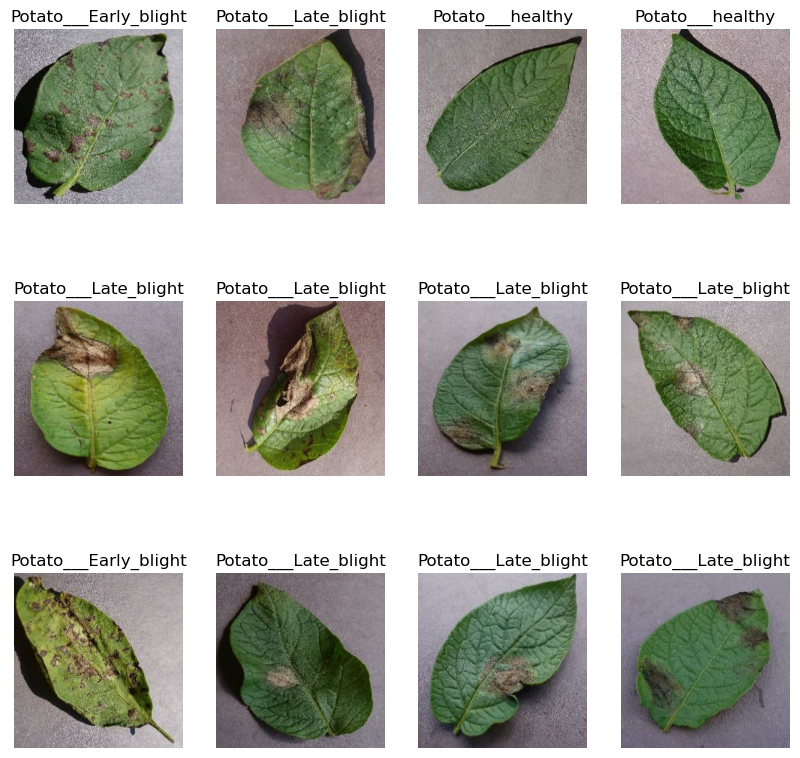

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')
    

In [8]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=25

In [9]:
train_size=0.8
len(dataset)*0.8

54.400000000000006

In [10]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)

In [11]:
len(test_ds),len(train_ds)

(14, 54)

In [12]:
val_size=0.1
len(dataset)*0.1

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
len(train_ds)+len(val_ds)+len(test_ds)

68

In [16]:
def get_dataset_patition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size)
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size+val_size)
    
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=get_dataset_patition(dataset)

In [18]:
len(train_ds)+len(val_ds)+len(test_ds)

68

In [19]:
train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 266, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
resize_rescale=tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255) 

])

In [21]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense

In [23]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=3 
model=tf.keras.models.Sequential([
    resize_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,'relu'),
    Dense(n_classes,'softmax')
   
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [26]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=val_ds,verbose=1)

Epoch 1/25
54/54 [==============================] - 72s 1s/step - loss: 0.9100 - accuracy: 0.4797 - val_loss: 0.8987 - val_accuracy: 0.6406
Epoch 2/25
54/54 [==============================] - 58s 1s/step - loss: 0.6883 - accuracy: 0.7007 - val_loss: 0.4515 - val_accuracy: 0.7969
Epoch 3/25
54/54 [==============================] - 57s 1s/step - loss: 0.4510 - accuracy: 0.7981 - val_loss: 0.3430 - val_accuracy: 0.8802
Epoch 4/25
54/54 [==============================] - 55s 1s/step - loss: 0.3231 - accuracy: 0.8709 - val_loss: 0.2534 - val_accuracy: 0.8906
Epoch 5/25
54/54 [==============================] - 55s 1s/step - loss: 0.3060 - accuracy: 0.8768 - val_loss: 0.3477 - val_accuracy: 0.8802
Epoch 6/25
54/54 [==============================] - 56s 1s/step - loss: 0.2535 - accuracy: 0.9005 - val_loss: 0.3491 - val_accuracy: 0.8542
Epoch 7/25
54/54 [==============================] - 54s 991ms/step - loss: 0.2290 - accuracy: 0.9026 - val_loss: 0.1604 - val_accuracy: 0.9427
Epoch 8/25
54/54 

In [27]:
model.evaluate(test_ds)

8/8 [==============================] - 3s 197ms/step - loss: 0.1481 - accuracy: 0.9453


[0.1481204628944397, 0.9453125]

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

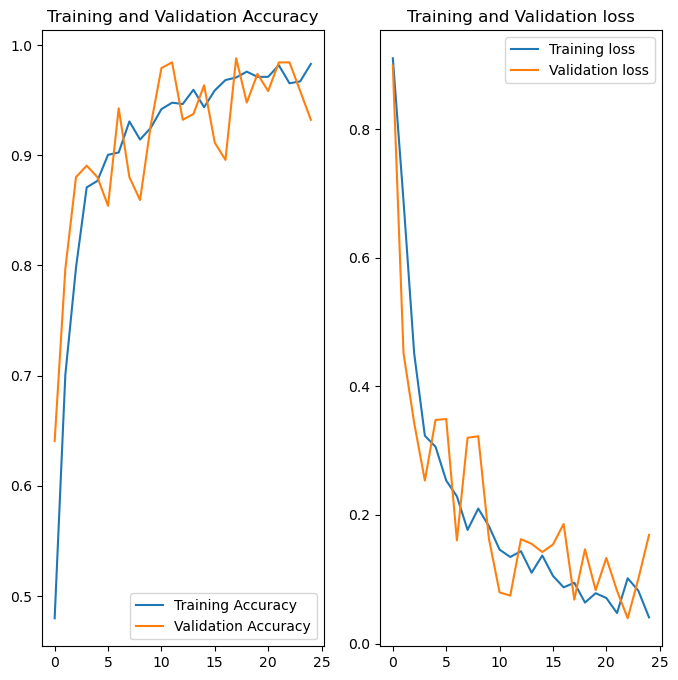

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc=4)
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc=1)
plt.title('Training and Validation loss')

In [30]:
import numpy as np
np.argmax([9.9056154e-01 ,9.4385101e-03 ,1.1393008e-08])


0

first image to predict
first image actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
Potato___Late_blight


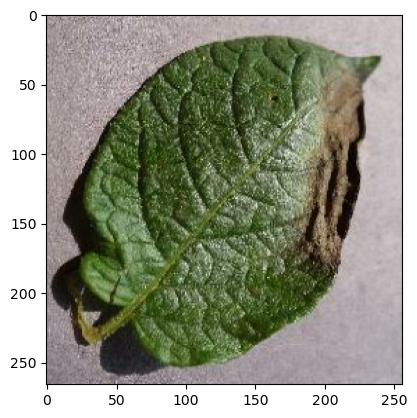

In [31]:
for image_batch,label_batch in dataset.take(1):
    print('first image to predict')
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print('first image actual label:',class_name[label_batch[0].numpy()])
    
    batch_prediction=model.predict(image_batch)
    print(class_name[np.argmax(batch_prediction[0])])

In [32]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) # create a batch
    prediction=model.predict(img_array)
    predicted_class=class_name[np.argmax(prediction[0])]
    confidence=round(100*(np.max(prediction[0])))
    return predicted_class,confidence
       
    

1/1 [==============================] - 0s 30ms/step


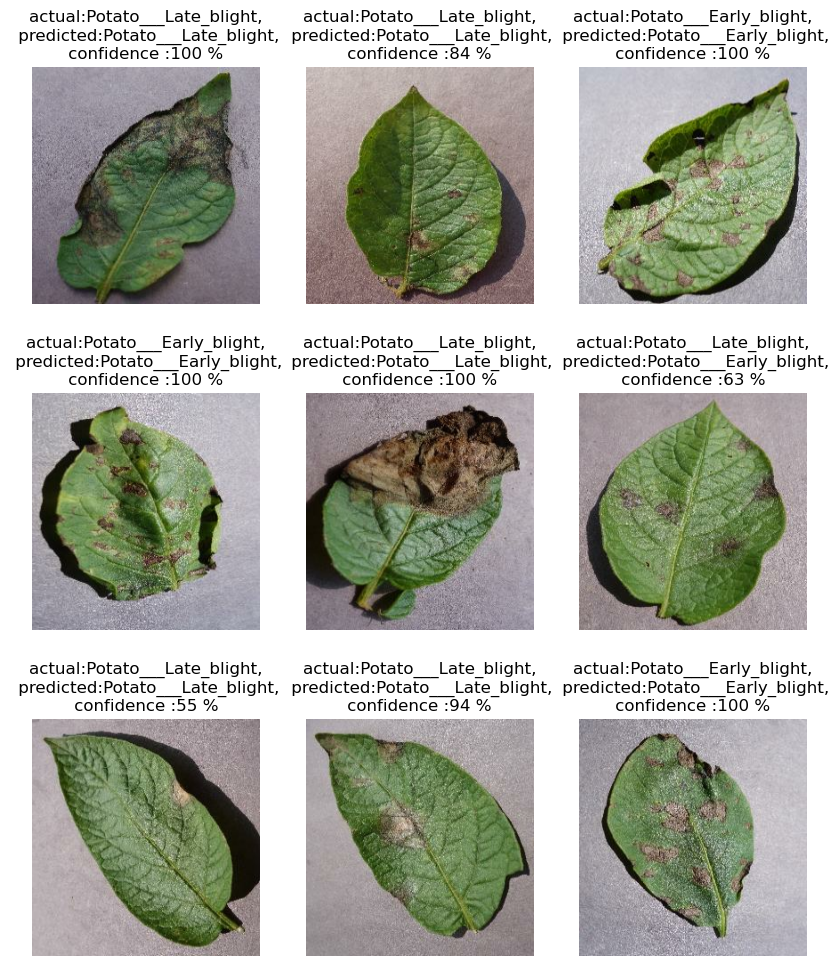

In [33]:
plt.figure(figsize=(10,12))
for images,labels in test_ds.take(1):
     for i in range (9):
            ax=plt.subplot(3,3,i+1)
            
            plt.imshow(images[i].numpy().astype('uint8'))
            
            actual_class=class_name[labels[i]]
            predicted_class,confidence=predict(model,images[i].numpy())
            plt.title(f'actual:{actual_class},\n predicted:{predicted_class},\n confidence :{confidence} % ')
            plt.axis('off')

In [35]:
model_version=1
model.save(f'../Potato-desease/saved_model/{model_version}')

INFO:tensorflow:Assets written to: ../Potato-desease/saved_model/1\assets


INFO:tensorflow:Assets written to: ../Potato-desease/saved_model/1\assets
